# Speed Comparison Analysis

Author: Joshua Roberge

This was done in Google colab

Data Read in

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Reading in the Data
df = pd.read_csv("/content/drive/MyDrive/final4.csv")
df.columns = df.columns.str.strip()

# Flatening the Data Out
df = df.melt(id_vars=["N"],var_name="Operation", value_name="Time (sec)")
df["Data Structure"] = df["Operation"].str.split(" ", expand=True)[0]
df["Operation"] = df["Operation"].str.replace(r'^\s?\w+\s*', '', regex=True)
df["Operation"] = df["Operation"].str.strip()
df["Data Structure"] = df["Data Structure"].str.strip()



## Inspection for Indivudal Plots

Used for Exploring some of the Grpahs

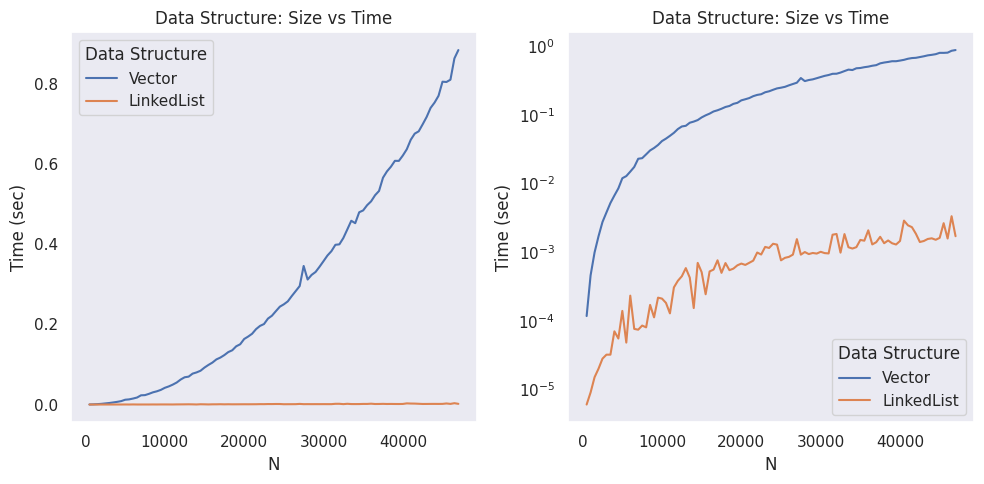

In [ ]:
sns.set_style("dark")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

def make_chart(
    data: pd.DataFrame,
    x: str,
    y: str,
    hue: str,
    title_reg: str,
    title_log:str,
    ax = axes[0]
):
  sns.lineplot(x=data[x], y=data[y], hue =data[hue], ax = ax)
  ax.set_title(title_reg)
  return ax


axes[0] = make_chart(
    data = df[df["Operation"] == "Add Front"],
    x = "N",
    y = "Time (sec)",
    hue = "Data Structure",
    title_reg = "Data Structure: Size vs Time",
    title_log = "Data Structure: Size vs log(Time)",
    ax = axes[0]
)

axes[1]  = make_chart(
    data = df[df["Operation"] == "Add Front"],
    x = "N",
    y = "Time (sec)",
    hue = "Data Structure",
    title_reg = "Data Structure: Size vs Time",
    title_log = "Data Structure: Size vs log(Time)",
    ax = axes[1]
)

axes[1].set_yscale("log")
plt.tight_layout()
plt.show()

## Facet Grid Operations Vs Time

Creating a line and scatterplot for each combination

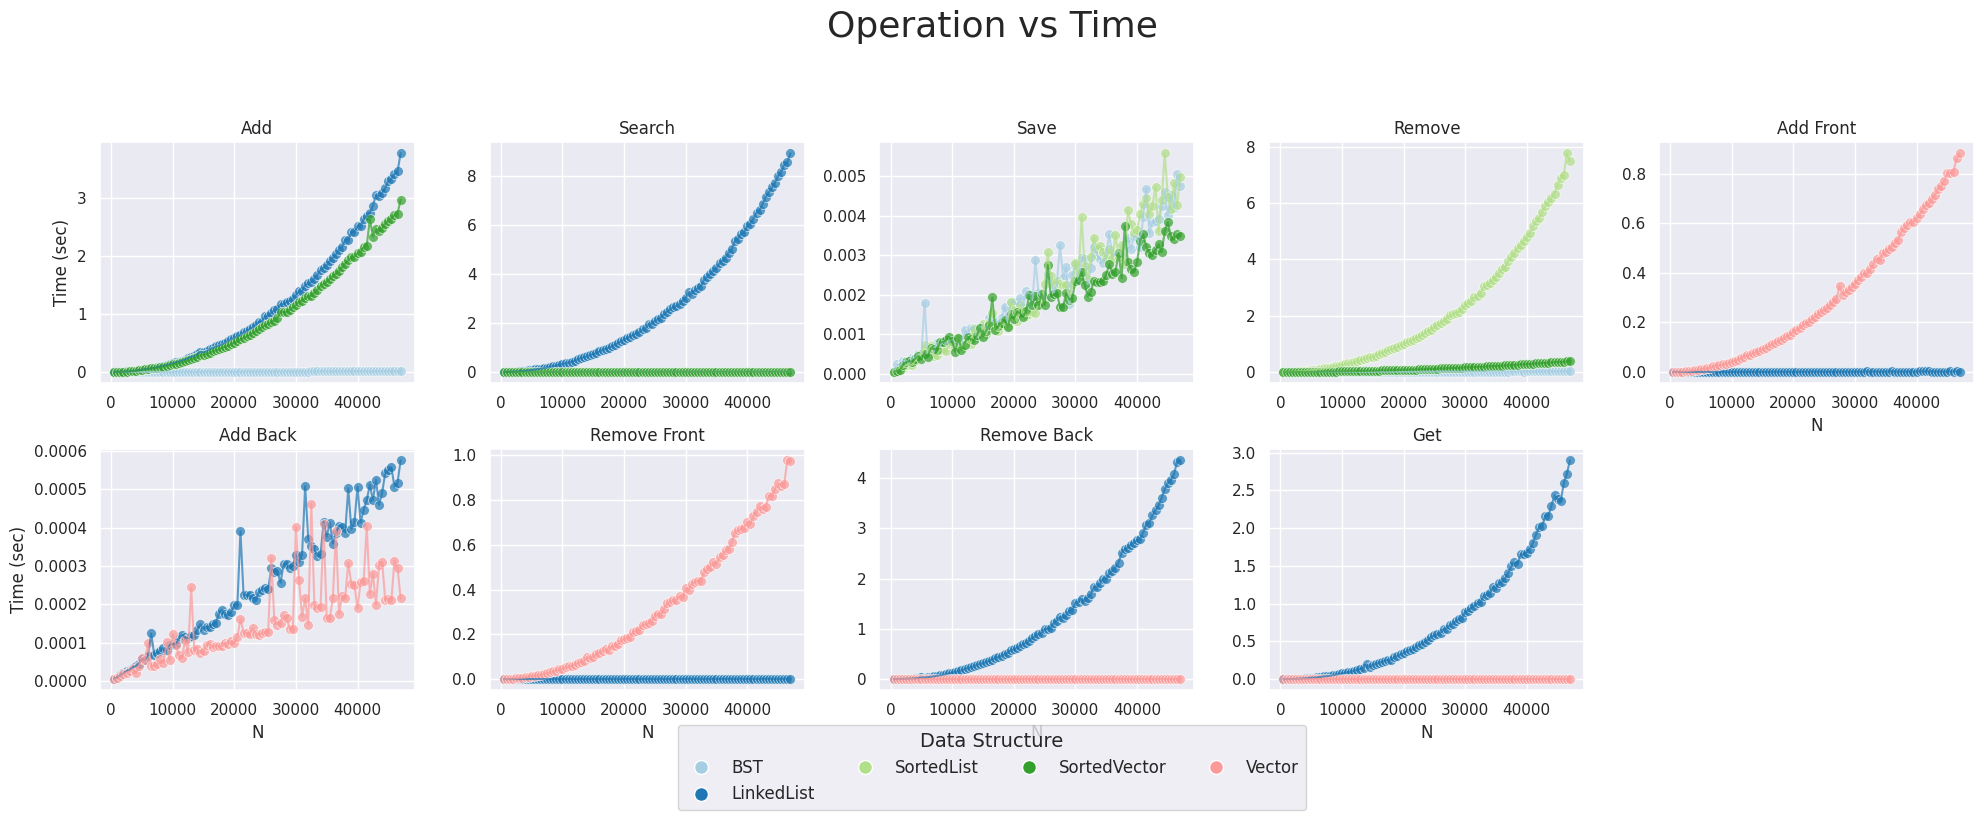

In [ ]:
# Presents
sns.set_theme(style="darkgrid")
hue_order = sorted(df["Data Structure"].unique())
palette = sns.color_palette("Paired", len(hue_order))

# Creating Grid
g = sns.FacetGrid(
    df,
    col="Operation",
    hue="Data Structure",
    hue_order=hue_order,
    palette=palette,
    col_wrap=5,
    sharey=False,
    sharex=False,
    height=4,
    legend_out=False,
    despine=False,
)

# Mapping operations and time
g.map(sns.scatterplot, "N", "Time (sec)", alpha=0.7, s=50)
g.map(sns.lineplot, "N", "Time (sec)", alpha=0.7)

# Super Titles
g.set_titles(col_template="{col_name}")
g.set_axis_labels("N", "Time (sec)")
plt.suptitle("Operation vs Time", fontsize=26, y=1.05)

## Looping though and getting legend colors
handler = []
for i, lab in enumerate(hue_order):
  handler.append(Line2D([0], [0], marker='o', color='w', label=lab,
                        markerfacecolor=palette[i], markersize=10, linestyle='None'))

## Making one Legend for Everything
g.fig.legend(
    handles=handler,
    labels=hue_order,
    title="Data Structure",
    loc="lower center",
    ncol=4,
    fontsize=12,
    title_fontsize=14,
    frameon=True,
    borderaxespad=1.5,
)

plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.subplots_adjust(bottom=0.20)

plt.show()


## Facet Grid Log time

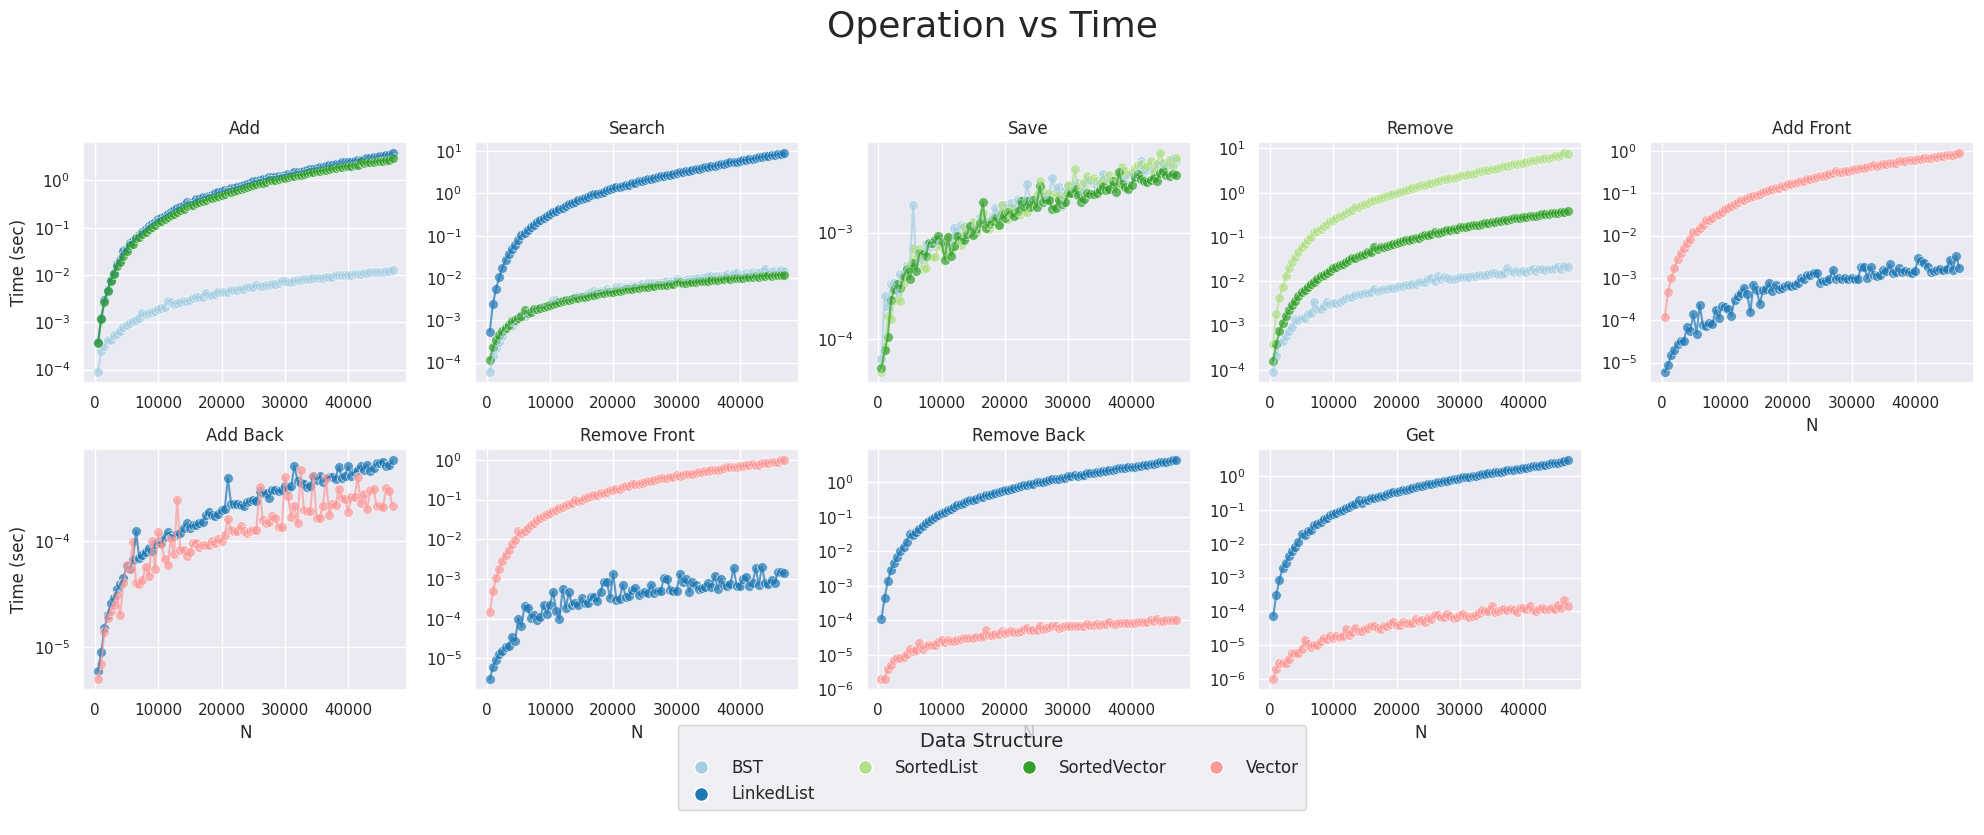

In [ ]:
# Presents
sns.set_theme(style="darkgrid")
hue_order = sorted(df["Data Structure"].unique())
palette = sns.color_palette("Paired", len(hue_order))

# Creating Grid
g = sns.FacetGrid(
    df,
    col="Operation",
    hue="Data Structure",
    hue_order=hue_order,
    palette=palette,
    col_wrap=5,
    sharey=False,
    sharex=False,
    height=4,
    legend_out=False,
    despine=False,
)

# setting you to log
for ax in g.axes.flat:
    ax.set_yscale('log')

# Mapping operations and time
g.map(sns.scatterplot, "N", "Time (sec)", alpha=0.7, s=50)
g.map(sns.lineplot, "N", "Time (sec)", alpha=0.7)

# Super Titles
g.set_titles(col_template="{col_name}")
g.set_axis_labels("N", "Time (sec)")
plt.suptitle("Operation vs Time", fontsize=26, y=1.05)

## Looping though and getting legend colors
handler = []
for i, lab in enumerate(hue_order):
  handler.append(Line2D([0], [0], marker='o', color='w', label=lab,
                        markerfacecolor=palette[i], markersize=10, linestyle='None'))

## Making one Legend for Everything
g.fig.legend(
    handles=handler,
    labels=hue_order,
    title="Data Structure",
    loc="lower center",
    ncol=4,
    fontsize=12,
    title_fontsize=14,
    frameon=True,
    borderaxespad=1.5,
)

plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.subplots_adjust(bottom=0.20)

plt.show()


# Box and Wisker Bob

is in time of per value of $n$. Show the varioation between the different operations.

<Axes: title={'center': 'Time Per Value of N and Operation'}, xlabel='time_per_n', ylabel='Operation'>

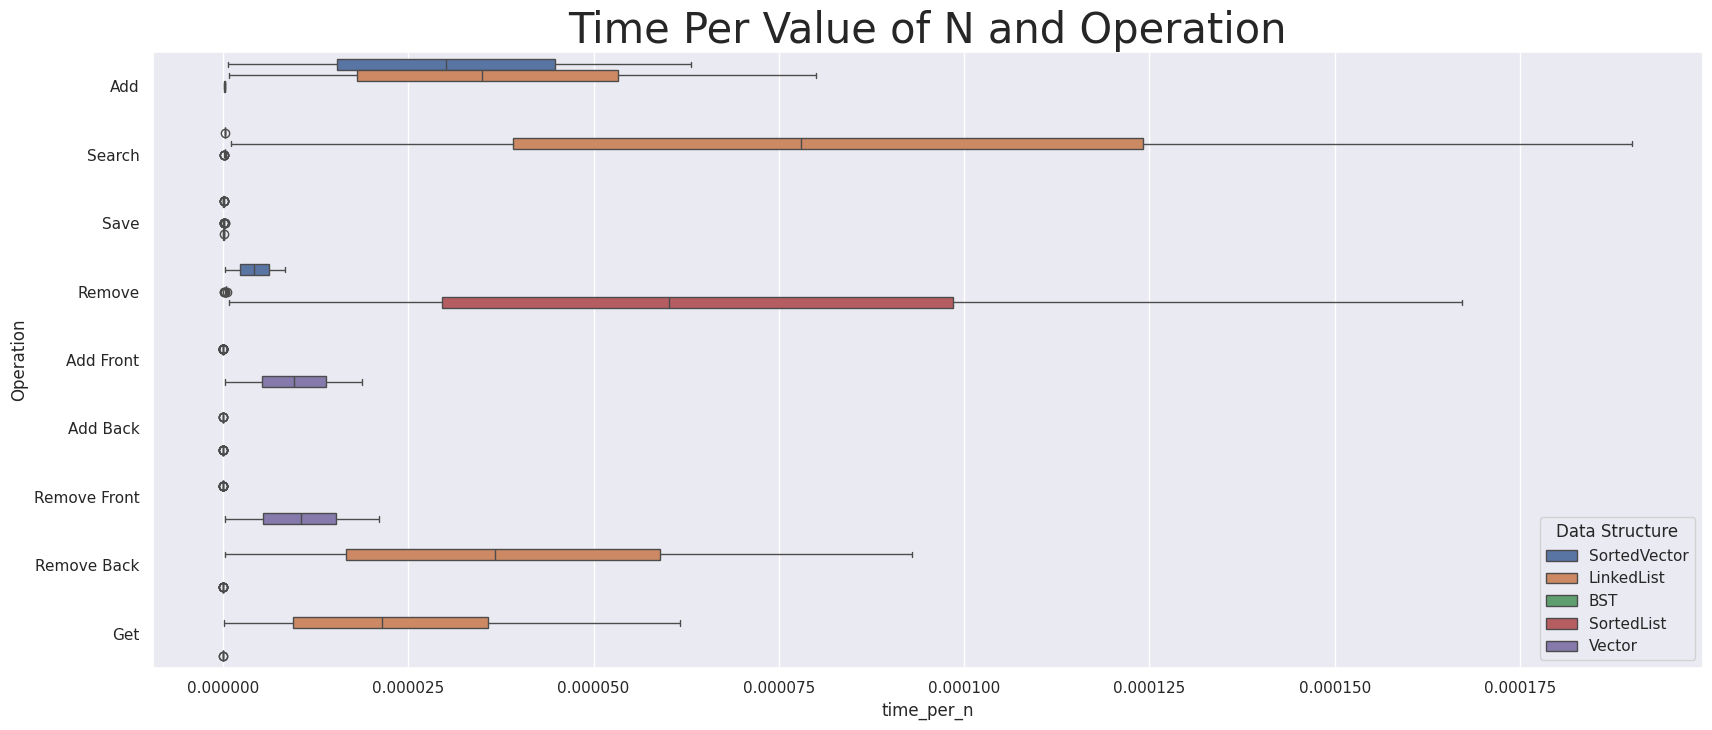

In [11]:
df["time_per_n"]   = df["Time (sec)"] / df["N"]
plt.figure(figsize=(20, 8))
plt.title("Time Per Value of N and Operation", fontdict={"fontsize": 30})
sns.boxplot(data=df,  y="Operation", x="time_per_n", hue="Data Structure")
